In [1]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table
import numpy as np
import time
import datetime as dt
import scipy.stats as st

In [2]:
#setting up DataFrame
value_index = "../Resources/FRED Housing from Age 25-34.csv"
value = pd.read_csv(value_index)
value_df = pd.DataFrame(value)
value_df

,DATE,CXUHOUSINGLB0403M
0,2016-01-01,18587
1,2017-01-01,19927
2,2018-01-01,19627
3,2019-01-01,20499
4,2020-01-01,21223
5,2021-01-01,22641


In [3]:
#Checking Data Types
display(value_df.dtypes)

DATE                 object
CXUHOUSINGLB0403M     int64
dtype: object

In [4]:
#Changing the Date Column to Date-Time Data Type
value_df['DATE'] = pd.to_datetime(value_df['DATE'])
display(value_df.dtypes)

DATE                 datetime64[ns]
CXUHOUSINGLB0403M             int64
dtype: object

In [5]:
#dropping Data outside of parameters
clean_df = value_df.drop([0])
clean_df

,DATE,CXUHOUSINGLB0403M
1,2017-01-01,19927
2,2018-01-01,19627
3,2019-01-01,20499
4,2020-01-01,21223
5,2021-01-01,22641


In [6]:
#Getting Statistics
home_value = clean_df['CXUHOUSINGLB0403M']
mean_numpy = np.mean(home_value)
print(f"The Average Home Value for ages 25-34 from our cleaned data is ${mean_numpy}")

median_numpy = np.median(home_value)
print(f"The Median Home Vaue for ages 25-34 from our cleaned data is ${median_numpy}")

min_value = clean_df['CXUHOUSINGLB0403M'].min()
print(f"The Lowest Home Value for 25-34 year olds in our dataset is ${min_value}")

max_value = clean_df['CXUHOUSINGLB0403M'].max()
print(f"The Highest Home Value for 25-34 year olds in our dataset is ${max_value}")

The Average Home Value for ages 25-34 from our cleaned data is $20783.4
The Median Home Vaue for ages 25-34 from our cleaned data is $20499.0
The Lowest Home Value for 25-34 year olds in our dataset is $19627
The Highest Home Value for 25-34 year olds in our dataset is $22641


In [7]:
#creating a DataFrame of our Statistics
stats_df = pd.DataFrame(
    {"Statistic" : ["Mean", "Median", "Min", "Max"],
    "Home Values" : [mean_numpy, median_numpy, min_value, max_value]}
)
stats_df

,Statistic,Homes Bought
0,Mean,20783.4
1,Median,20499.0
2,Min,19627.0
3,Max,22641.0


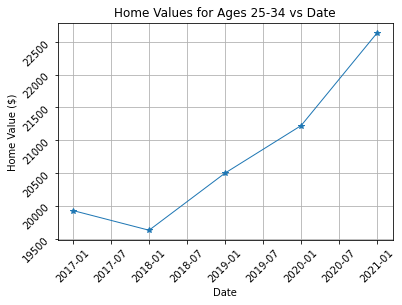

In [10]:
#Plotting our Findings
x = clean_df['DATE']
y = clean_df['CXUHOUSINGLB0403M']

plt.plot(x, y, marker='*', linewidth=1)

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

#Formatting Scatter Plot
plt.title("Home Values for Ages 25-34 vs Date")
plt.ylabel("Home Value ($)")
plt.xlabel("Date")
plt.grid()

plt.savefig("../Images/HomeValuesvsDate.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

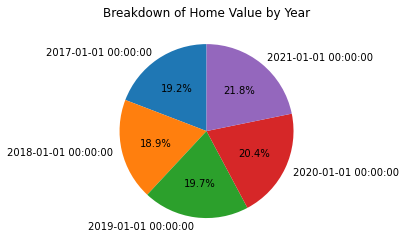

In [11]:
#Looking at Data in as a Pie Chart
plt.pie(clean_df['CXUHOUSINGLB0403M'], labels=clean_df['DATE'], autopct="%1.1f%%", startangle=90)
plt.title("Breakdown of Home Value by Year")
plt.savefig("../Images/BreakdownofHomeValue.png")
plt.show